<a href="https://colab.research.google.com/github/Smarth2005/Machine-Learning/blob/main/Data%20Preprocessing/Feature%20Scaling%20and%20Transformation/9.%20Quantile%20Transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 📊 QuantileTransformer: Mapping Features to a Uniform or Normal Distribution

The `QuantileTransformer` is a non-linear transformation technique that **transforms the feature distribution based on quantiles**. It maps the original data to follow either a **uniform** or **normal (Gaussian)** distribution by ranking the values and assigning new values based on target quantiles.

Unlike standard scaling or power-based transformations, it **preserves the relative ordering** of data but **destroys distances between observations** — making it highly effective for **highly skewed or heavy-tailed distributions**.

#### ⚙️ <u>How It Works</u>
- Uses the empirical cumulative distribution function (CDF) to transform the feature.
- Target distribution can be:
  - `'uniform'` (default)
  - `'normal'` &nbsp;&nbsp;(bell-shaped)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing   import QuantileTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble        import RandomForestRegressor
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.linear_model    import LinearRegression
from sklearn.svm             import SVR
from sklearn.pipeline        import Pipeline

To begin, we will experiment with the `QuantileTransformer` on the Wine dataset to observe its impact on feature distributions.


In [2]:
# Load the wine dataset
from sklearn.datasets import load_wine
wine = load_wine()
df   = pd.DataFrame(wine.data, columns=wine.feature_names)

In [3]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (178). n_quantiles is set to n_samples.
  warnings.warn(


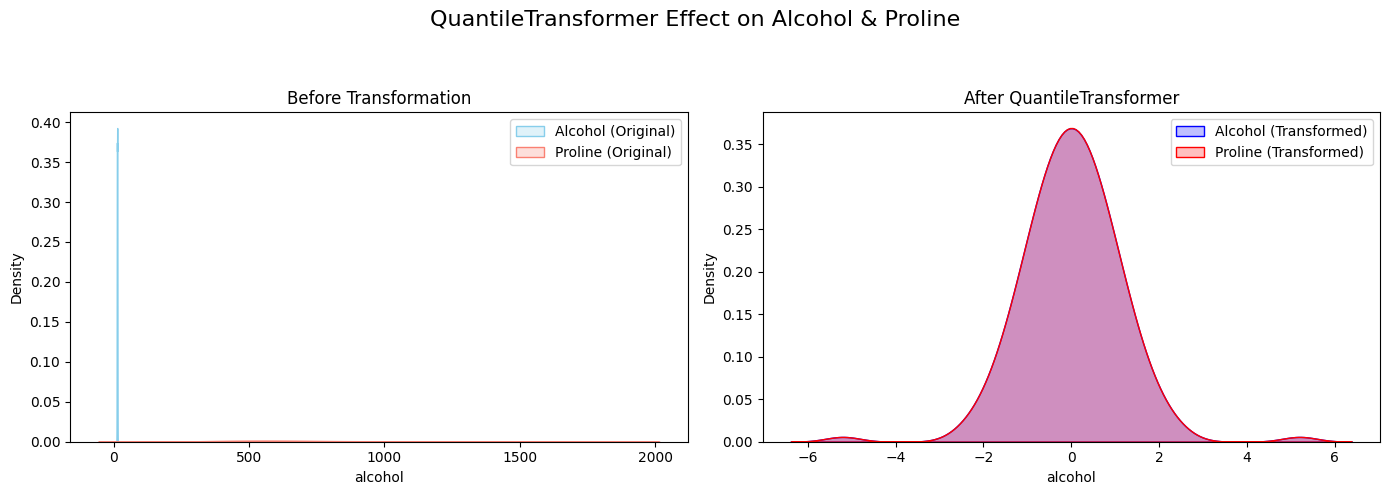

In [4]:
# Select the two features
features = ['alcohol', 'proline']

# Apply PowerTransformer (Yeo-Johnson)
pt = QuantileTransformer(output_distribution='normal')
df_transformed = df.copy()
df_transformed[features] = pt.fit_transform(df[features])

# Plot KDE before and after transformation
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('QuantileTransformer Effect on Alcohol & Proline', fontsize=16)

# Before transformation
sns.kdeplot(df['alcohol'], label='Alcohol (Original)', fill=True, ax=axes[0], color='skyblue')
sns.kdeplot(df['proline'], label='Proline (Original)', fill=True, ax=axes[0], color='salmon')
axes[0].set_title('Before Transformation')
axes[0].legend()

# After transformation
sns.kdeplot(df_transformed['alcohol'], label='Alcohol (Transformed)', fill=True, ax=axes[1], color='blue')
sns.kdeplot(df_transformed['proline'], label='Proline (Transformed)', fill=True, ax=axes[1], color='red')
axes[1].set_title('After QuantileTransformer')
axes[1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

<div align="justify">

✅ The result is remarkable — the transformed features now exhibit an **excellent bell-shaped curve**, closely resembling a perfect **Gaussian distribution**. This highlights the effectiveness of `QuantileTransformer` in reshaping skewed or irregular feature distributions into a standard normal form.

Having observed the impressive results on the Wine dataset, we now apply the `QuantileTransformer` to the `fetch_california_housing` dataset to evaluate its performance on a more complex, real-world dataset.

</div>

In [5]:
from sklearn.datasets import fetch_california_housing
X,y = fetch_california_housing(as_frame=True, return_X_y=True)

In [6]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [8]:
X = X.iloc[:,:-2]
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
def plots(df, var, t):
  plt.figure(figsize=(13,5))
  plt.subplot(121)
  sns.kdeplot(df[var])
  plt.title('before ' + str(t).split('(')[0])

  plt.subplot(122)
  p1 = t.fit_transform(df[[var]]).flatten()
  sns.kdeplot(p1)
  plt.title('after ' + str(t).split('(')[0])

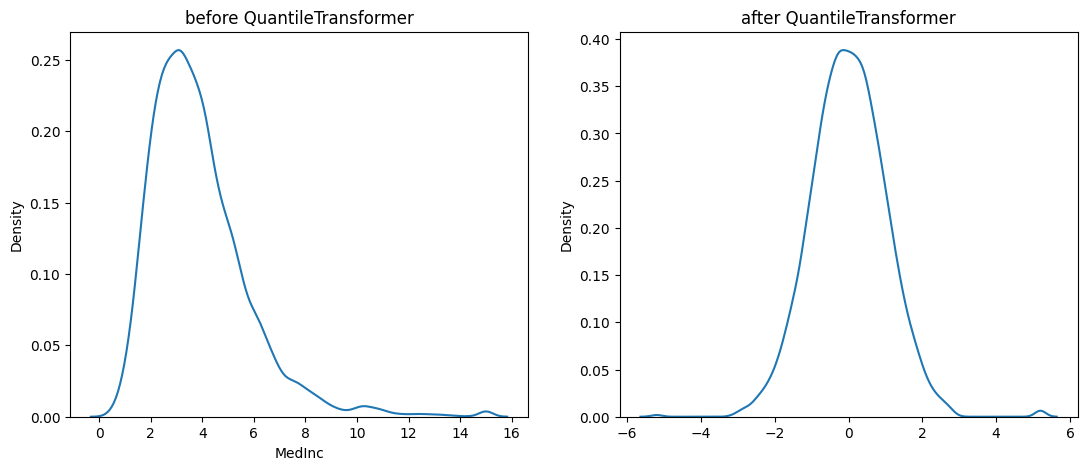

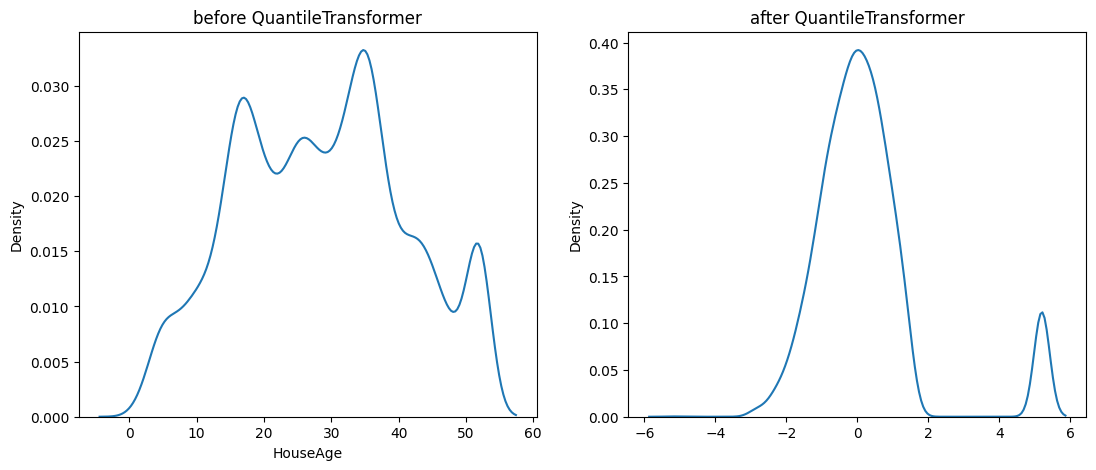

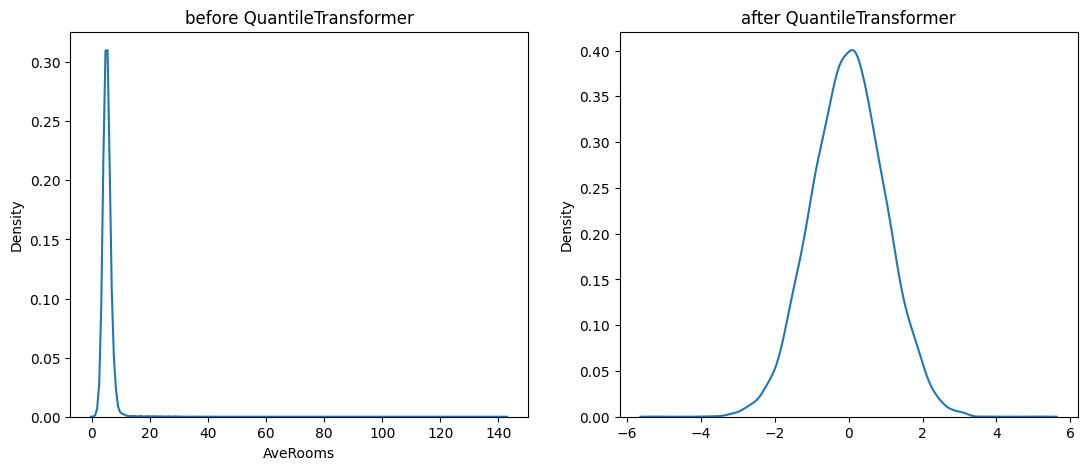

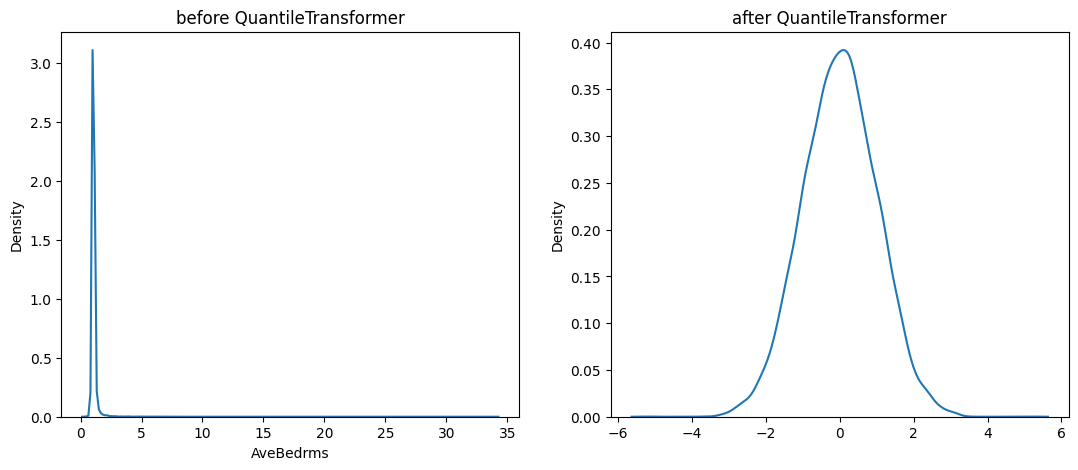

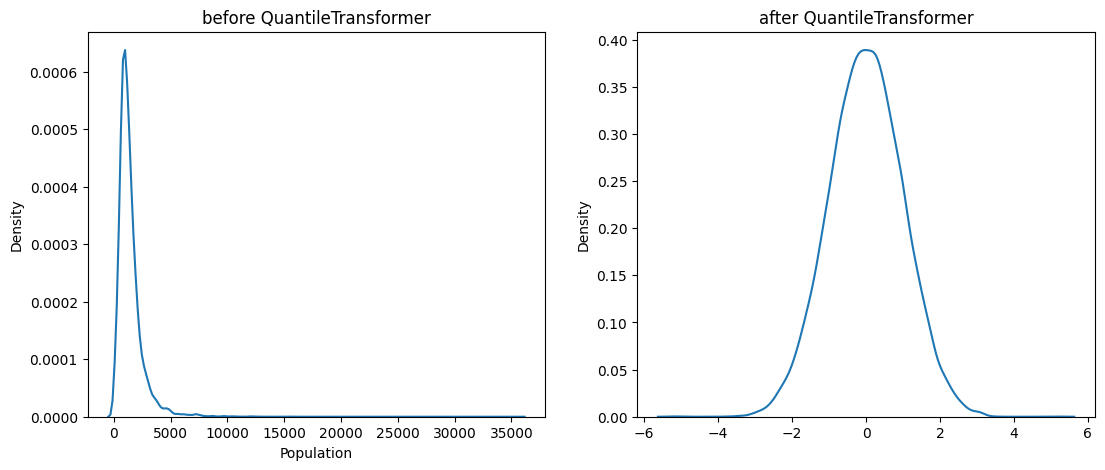

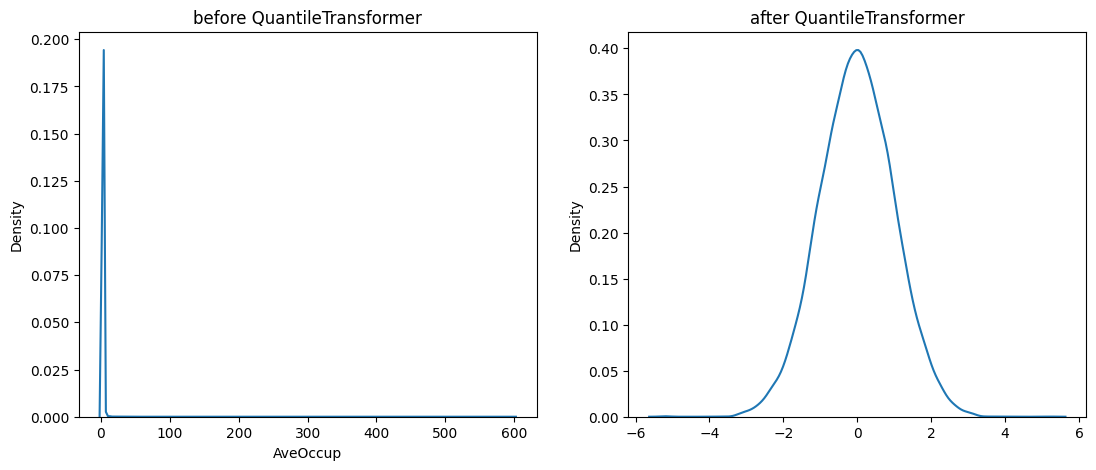

In [11]:
for col in x_train.columns:
  plots(x_train, col, QuantileTransformer(output_distribution='normal'))
  # the default output_distribution is 'uniform'

The transformed features now follow **bell-shaped, symmetric distributions**, indicating that `QuantileTransformer` has effectively normalized even the originally skewed features.


In [12]:
q = QuantileTransformer(output_distribution='normal')
q.fit_transform(x_train)

array([[ 0.44172377, -1.86585209,  1.68161775,  1.22919109, -1.89239835,
         0.91825768],
       [ 0.5159301 ,  5.19933758,  0.08980282,  0.67487607,  0.41792599,
         0.72149667],
       [ 0.25128285, -0.16891199, -0.46904377, -0.05479456, -0.2200582 ,
        -0.04100381],
       ...,
       [-0.18732412,  0.13337869, -1.45684799, -1.60064035, -0.86436505,
        -1.81540331],
       [ 1.09708136,  0.36017172, -0.57865287,  0.21318448, -0.17273102,
        -0.98737911],
       [-1.89365043, -1.04440879, -1.15024979,  0.67487607, -0.2174883 ,
         0.85186568]])

In [13]:
q.n_quantiles_

1000

In [14]:
q.quantiles_

array([[4.99900000e-01, 1.00000000e+00, 8.46153846e-01, 3.33333333e-01,
        5.00000000e+00, 9.70588235e-01],
       [5.36000000e-01, 2.00000000e+00, 1.92724840e+00, 6.96996997e-01,
        1.90090090e+01, 1.28978325e+00],
       [7.47395495e-01, 2.00000000e+00, 2.11794042e+00, 7.54462266e-01,
        2.50180180e+01, 1.35196204e+00],
       ...,
       [1.50001000e+01, 5.20000000e+01, 2.64447671e+01, 5.27339703e+00,
        9.41763063e+03, 1.12902261e+01],
       [1.50001000e+01, 5.20000000e+01, 3.48161286e+01, 6.35050637e+00,
        1.04736847e+04, 1.58102699e+01],
       [1.50001000e+01, 5.20000000e+01, 1.32533333e+02, 3.40666667e+01,
        3.56820000e+04, 5.02461538e+02]])

In [15]:
def model_accuracy_scaled(mod):
  model_scaled = Pipeline([
      ('scale', QuantileTransformer(output_distribution='normal')),
      ('model', mod)
  ])
  model_scaled.fit(x_train, y_train)
  return model_scaled.score(x_test, y_test)

def model_accuracy_unscaled(mod):
  model_unscaled = Pipeline([
      ('model', mod)
  ])
  model_unscaled.fit(x_train, y_train)
  return model_unscaled.score(x_test, y_test)

In [16]:
# Define models to test
models = {
    "Linear Regression": LinearRegression(),
    "KNN Regressor": KNeighborsRegressor(),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(random_state=42)
}

# Print accuracy scores
print(f"{'Model':<25} {'Unscaled R²':<15} {'Scaled R²'}")
print("-" * 55)
for name, model in models.items():
    unscaled_score = model_accuracy_unscaled(model)
    scaled_score = model_accuracy_scaled(model)
    print(f"{name:<25} {unscaled_score:<15.4f} {scaled_score:.4f}")

Model                     Unscaled R²     Scaled R²
-------------------------------------------------------
Linear Regression         0.5251          0.5398
KNN Regressor             0.1719          0.6397
SVR                       -0.0173         0.6948
Random Forest             0.6699          0.6697


#### Conclusion:
<div align="justify">

Model performance is similar across both Power Transformer and Quantile Transformer, because their goal — producing Gaussian-like, standardized inputs — benefits the same types of models. However, `QuantileTransformer` may outperform slightly on highly skewed or irregular features, while `PowerTransformer` retains better feature interpretability.
</div>